In [3]:
import W2V as w2v

## 1. Fit Word2Vec

In [5]:
corpus = w2v.get_text(amount_of_sentense=1000)

In [6]:
w2vec = Word2Vec(d=50, h=2)

In [7]:
w2vec.fit(coprusI=corpus)

Start counting dictionary
Vocabulary size 33870
All Words
Start fitting
Emb: (33870, 50), Context: (50, 33870), 33870
epoch 0

	 loss = 11.49092143456842

Word 0

	 loss = 9818.922064784503

Word 1000

	 loss = 19293.13074356881

Word 2000

	 loss = 28448.762877320856

Word 3000

	 loss = 37414.048177320736

Word 4000

	 loss = 46262.118160469036

Word 5000

	 loss = 54775.6821794523

Word 6000

	 loss = 63399.62132894579

Word 7000

	 loss = 72006.31809720631

Word 8000

	 loss = 80584.18892793711

Word 9000

	 loss = 89593.86320044655

Word 10000

	 loss = 98727.72802555661

Word 11000

	 loss = 107681.99938814915

Word 12000

	 loss = 116537.62415064932

Word 13000

	 loss = 125422.36001374922

Word 14000

	 loss = 134216.8041843019

Word 15000

	 loss = 142734.49437701172

Word 16000

	 loss = 151638.11166901785

Word 17000

	 loss = 160244.04744822442

Word 18000

	 loss = 169023.22781549714

Word 19000

	 loss = 177709.11996136035

Word 20000

	 loss = 186333.66870413144

Word 21

Сохраняем модель и веса.

In [109]:
import pickle
pickle.dump(w2vec, open('w2v', 'wb'))
with open('w2v','rb') as file:
    weights = pickle.load(file)

## 2. Visualisation

In [110]:
import numpy as np
def cosine_distance(x, y):
    '''

    Parameters
    ----------
    x : np.ndarray размера N x D
        обучающая выборка.
    y : np.ndarray размера M x D
        тестовая выборка.

    Raises
    ------
    NotImplementedError
        DESCRIPTION.

    Returns
    -------
    Функция возвращает np.ndarray размера N x M,
    каждый элемент которого - косинусное расстояния между
    соответствующей парой векторов из массивов x и y.

    '''
    s = x @ y.T
    x2 = np.sqrt(np.sum(x**2, axis=1).reshape(-1, 1))
    y2 = np.sqrt(np.sum(y**2, axis=1))
    result = 1 - s / x2 / y2
    return result


def get_best_ranks(ranks, top, axis=1, return_ranks=False):
    indices = np.take(np.argpartition(ranks, range(-top, 0), axis=axis),
                      range(-1, -top-1, -1), axis=axis)
    result = (indices, )
    if return_ranks:
        ranks = np.take_along_axis(ranks, indices, axis=axis)
        result = (ranks, ) + result
    return result if len(result) > 1 else result[0]

### 2.1 Embeddings

In [236]:
def get_nearest_embeddings(model, word, k_neighbours=10, *args, **kwargs):
    if word in model.vocabulary.keys():
        metric_distance = cosine_distance(model.embedding[model.vocabulary[word]].reshape(1, -1), 
                                          model.embedding)
        distances, indices = get_best_ranks(-metric_distance,
                                        top=k_neighbours, axis=1,
                                        return_ranks=True)
        fig, ax = plt.subplots(1, 1, figsize=(20, 8))
        im = ax.imshow(weights.embedding[indices.ravel(), :], cmap='magma', interpolation='nearest')
        ax.set_aspect(2)
        a = [model.r[i] for i in indices.ravel()]
        ax.set_yticks(range(0, k_neighbours))
        ax.set_yticklabels(a)
        ax.set_xticks(np.arange(0, 50, 5))
        fig.colorbar(im, orientation='vertical')
        plt.show()
        return a

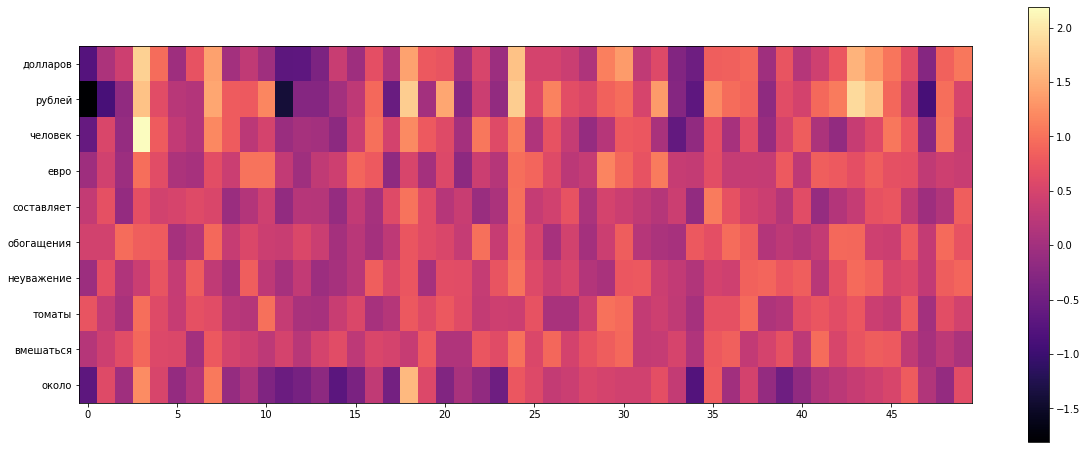

In [237]:
near = get_nearest_embeddings(weights, 'долларов', k_neighbours=10)

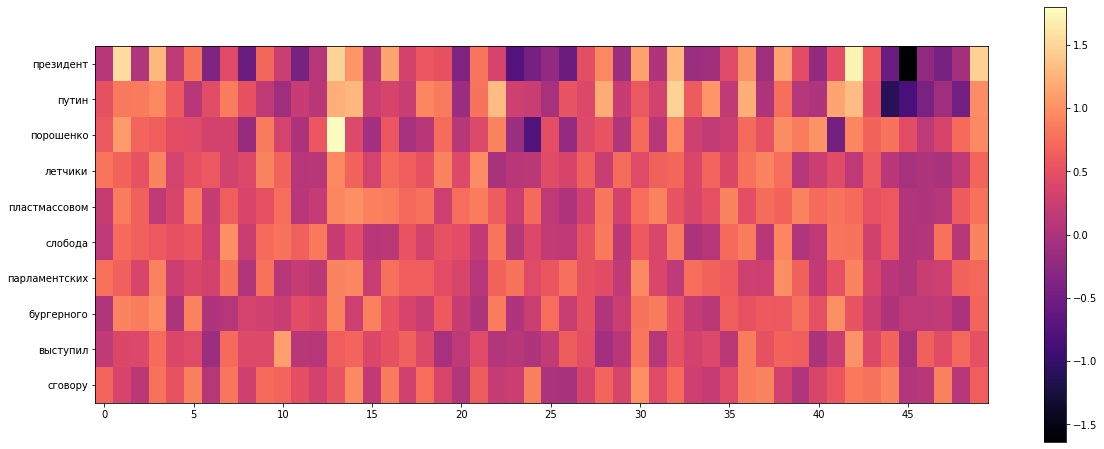

In [243]:
near = get_nearest_embeddings(weights, 'президент', k_neighbours=10)

## 2.2 Predict Next Word

In [256]:
weights.predict('президент')

'владимир'

In [258]:
weights.predict('тысяч')

'рублей'

In [259]:
weights.predict('в')

'году'